In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
import yfinance as yf
from matplotlib import rc
import platform
# 그래프에서 한글 깨짐 방지
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')


In [2]:
# # 삼성전자, KOSPI 데이터 불러오기
# stock_price = yf.download({'005930.KS','^KS11'}, '2022-01-01', '2022-01-21')

# stock_price

# yfinance 데이터 불러오기
stock_price = yf.download({'005930.KS','^KS11'}, '2019-01-01', '2022-01-01', period='1d')
stock_price

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
               005930.KS        ^KS11 005930.KS        ^KS11 005930.KS   
Date                                                                     
2019-01-02  34482.312500  2010.000000   38750.0  2010.000000   39400.0   
2019-01-03  33458.968750  1993.699951   37600.0  1993.699951   38550.0   
2019-01-04  33325.488281  2010.250000   37450.0  2010.250000   37600.0   
2019-01-07  34482.312500  2037.099976   38750.0  2037.099976   38900.0   
2019-01-08  33903.902344  2025.270020   38100.0  2025.270020   39200.0   
...                  ...          ...       ...          ...       ...   
2021-12-24  78211.703125  3012.429932   80500.0  3012.429932   80800.0   
2021-12-27  77920.234375  2999.550049   80200.0  2999.550049   80600.0   
2021-12-28  78017.390625  3020.239990   80300.0  3020.239990   80400.0   
2021-12-29  76905.765625  2993.290039   78800.0  2993.290039   80200.0   
2021-12-30  76417.789062  2977.649902   78300.0  2977.649902   79500.0   

                              Low                   Open               \
                  ^KS11 005930.KS        ^KS11 005930.KS        ^KS11   
Date                                                                    
2019-01-02  2053.449951   38550.0  2004.270020   39400.0  2050.550049   
2019-01-03  2014.719971   37450.0  1991.650024   38300.0  2011.810059   
2019-01-04  2011.560059   36850.0  1984.530029   37450.0  1992.400024   
2019-01-07  2048.060059   37800.0  2030.900024   38000.0  2034.239990   
2019-01-08  2042.699951   37950.0  2023.589966   38000.0  2038.680054   
...                 ...       ...          ...       ...          ...   
2021-12-24  3025.770020   80200.0  3009.479980   80200.0  3009.479980   
2021-12-27  3017.310059   79800.0  2999.300049   80600.0  3013.939941   
2021-12-28  3020.290039   79700.0  2991.550049   80200.0  3006.770020   
2021-12-29  3007.719971   78500.0  2988.669922   80200.0  3002.899902   
2021-12-30  3005.360107   78100.0  2975.739990   78900.0  2999.750000   

              Volume          
           005930.KS   ^KS11  
Date                          
2019-01-02   7847664  326400  
2019-01-03  12471493  428000  
2019-01-04  14108958  409000  
2019-01-07  12748997  440200  
2019-01-08  12756554  397800  
...              ...     ...  
2021-12-24  12086380  537500  
2021-12-27  10783368  475000  
2021-12-28  18226325  607000  
2021-12-29  19794795  545800  
2021-12-30  14236700  460600  

[742 rows x 12 columns]

In [3]:
_pct=((stock_price-stock_price.shift(1))/stock_price.shift(1)).dropna(axis=0)
_pct.head(3)

Adj Close               Close                High            \
           005930.KS     ^KS11 005930.KS     ^KS11 005930.KS     ^KS11   
Date                                                                     
2019-01-03 -0.029677 -0.008109 -0.029677 -0.008109 -0.021574 -0.018861   
2019-01-04 -0.003989  0.008301 -0.003989  0.008301 -0.024643 -0.001568   
2019-01-07  0.034713  0.013357  0.034713  0.013357  0.034574  0.018145   

                 Low                Open              Volume            
           005930.KS     ^KS11 005930.KS     ^KS11 005930.KS     ^KS11  
Date                                                                    
2019-01-03 -0.028534 -0.006297 -0.027919 -0.018892  0.589198  0.311275  
2019-01-04 -0.016021 -0.003575 -0.022193 -0.009648  0.131297 -0.044393  
2019-01-07  0.025780  0.023366  0.014686  0.021000 -0.096390  0.076284

# 2. 연속확률분포

## A. 정규분포, 표준정규분포

C:\Users\dgh06\AppData\Local\Temp\ipykernel_23244\2338022738.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{np.round(x1.std(),3)})")
C:\Users\dgh06\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


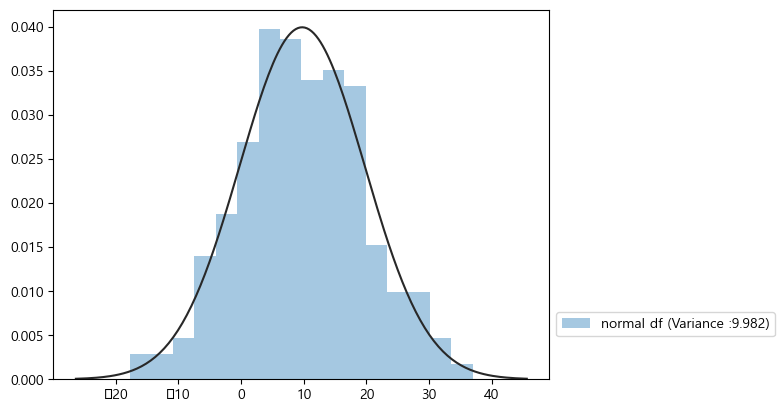

In [4]:
# 정규분포 그리는 코드 (예시)

# 라이브러리 호출
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

# 정규분포를 이루는 데이터 조건 형성
# 데이터 개수 500개, 분산, 평균 설정
N1 = 500           
sigma_1 = 10
mu_1 = 10

# 랜덤데이터 형성 (정규분포)
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N1)
# stats.norm은 정규분포를 나타내는 클래스(class),  평균 mu_1과 표준편차 sigma_1을 갖는 정규분포를 나타냅니다.
# rvs() 메서드는 분포로부터 무작위 표본을 생성하는 함수입니다. N1은 생성할 표본의 개수를 나타냅니다
#print(x1)

# 시각화
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{np.round(x1.std(),3)})")
plt.legend(bbox_to_anchor=(1.0, .2))
plt.show()

In [5]:
mu=0
sigma=1

(mu==0) & (sigma==1)

True

In [6]:
def normal_df(N, sigma, mu):
    # 랜덤데이터 형성 (정규분포)
    np.random.seed(0)
    x = sp.stats.norm(mu, sigma).rvs(N)
    # print(x)
    
    # 시각화 (mu=0으로 입력하는 경우 에러발생으로 인해 x-1을 넣어서 이를 해결함)
    sns.distplot(x-1, kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{x.std() : .3f})")
    plt.legend(bbox_to_anchor=(1.0, .2))
    plt.ylabel('PDF (확률밀도함수)')
    plt.xlabel('X (독립변수)')
    if (mu==1) & (sigma==1):
        plt.title('표준정규분포')
    else:
        plt.title('정규분포')
    plt.show()

C:\Users\dgh06\AppData\Local\Temp\ipykernel_23244\4039298260.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x-1, kde=False, fit=sp.stats.norm, label=f"normal df (Variance :{x.std() : .3f})")


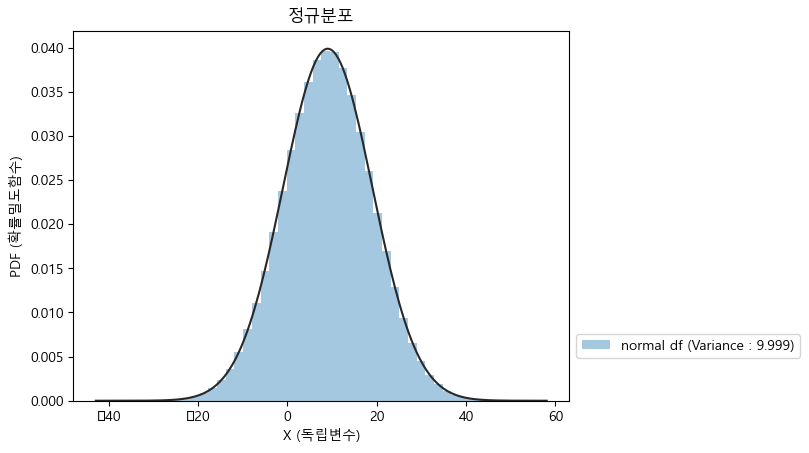

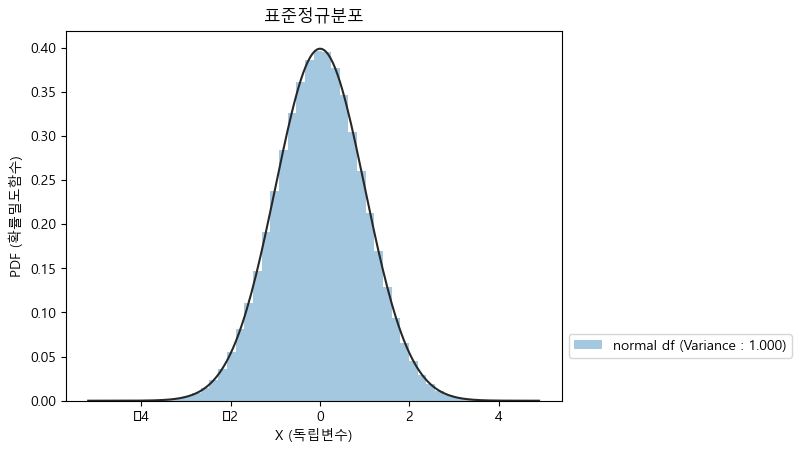

In [7]:
# 정규분포 형성 (평균 = 11-1, 표준편차 = 10)
normal_df(1000000, 10, 10)

# 표준정규분포 형성 (평균 = 1-1, 표준편차 = 1)
normal_df(1000000, 1, 1)

## B. T 분포

In [8]:
# 라이브러리 호출
import math
import numpy as np
import matplotlib.pyplot as plt

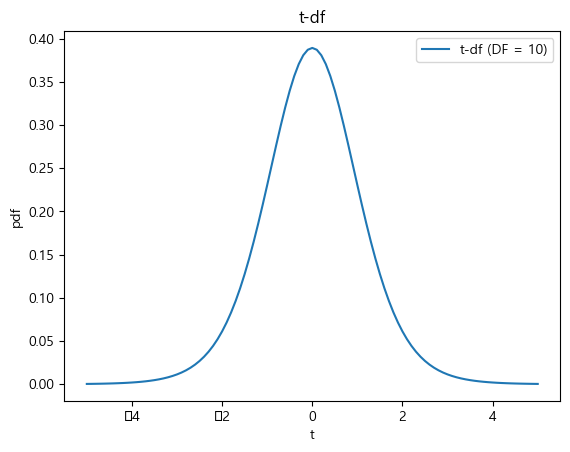

In [9]:
t = np.linspace(-5, 5, 101)
#print(t)
#[-5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7
#  -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3
#  -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9
#  -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5
#   0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
#   2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3
#   3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7
#   4.8  4.9  5. ]
# 자유도 설정
DF = 10
y = (math.gamma((DF+1) / 2) / (math.gamma(DF / 2) * math.sqrt(math.pi * DF))) * (1 + t ** 2 / DF) ** (-(DF + 1) / 2)

plt.plot(t, y)                       
plt.xlabel("t")                    
plt.ylabel("pdf")                      
plt.title("t-df")
plt.legend([f"t-df (DF = {DF})"])
plt.show()


- k=1이면 코시분포와 동일
- 자유도가 커질수록 표준정규분포에 가까워짐
- 자유도는 t-분포의 모양(shape)을 결정하는 중요한 요소 중 하나입니다. t-분포의 자유도가 증가할수록 분포의 뾰족한 정도는 증가하며, 분포의 꼬리는 좀 더 빨리 감소합니다. 

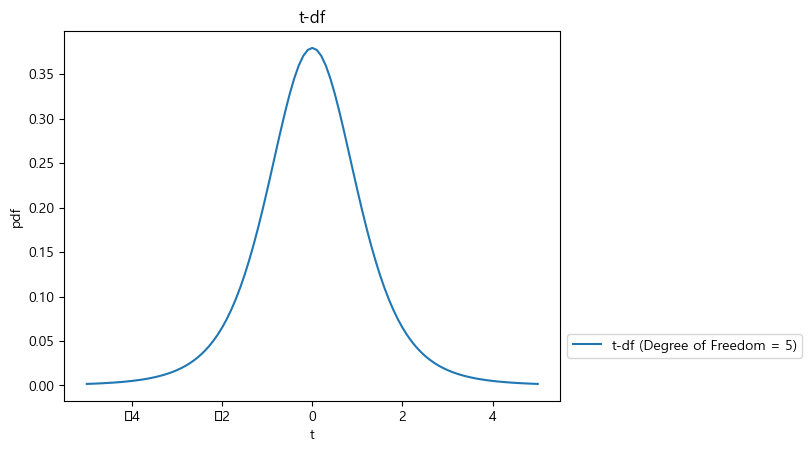

In [10]:
def t_df(DF):
    # 라이브러리 호출
    import math
    import numpy as np
    import matplotlib.pyplot as plt

    t = np.linspace(-5, 5, 101)
    y = (math.gamma((DF+1) / 2) / (math.gamma(DF / 2) * math.sqrt(math.pi * DF))) * (1 + t ** 2 / DF) ** (-(DF + 1) / 2)

    plt.plot(t, y)                       
    plt.xlabel("t")                    
    plt.ylabel("pdf")                      
    plt.title("t-df")
    plt.legend([f"t-df (Degree of Freedom = {DF})"], bbox_to_anchor=(1, .2))
    plt.show()
    
t_df(5)

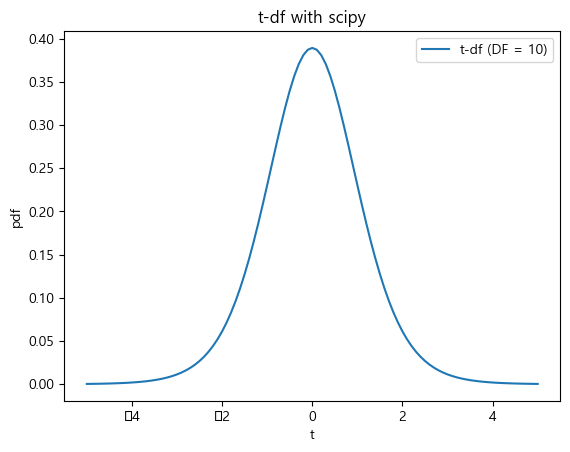

In [11]:
# scipy의 stats 호출로 t 분포 그리기
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

DF = 10
t = np.linspace(-5, 5, 101)
y1 = stats.t(DF).pdf(t)
       
plt.plot(t, y1)
plt.xlabel("t")
plt.ylabel("pdf")
plt.title("t-df with scipy")
plt.legend([f"t-df (DF = {DF})"])
plt.show()

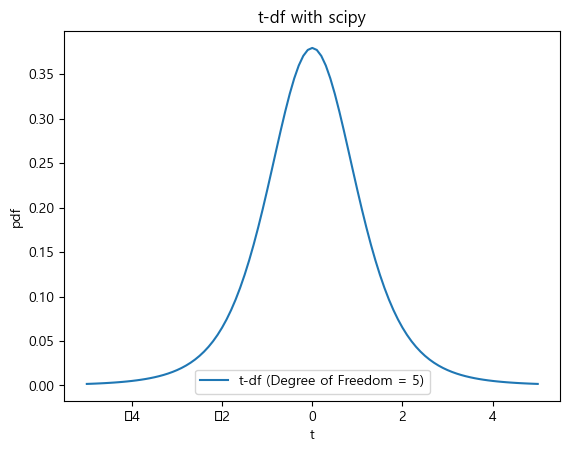

In [12]:
def t_df_stats(DF):
    import scipy.stats as stats
    import numpy as np
    import matplotlib.pyplot as plt

    t = np.linspace(-5, 5, 101)
    y1 = stats.t(DF).pdf(t)
        
    plt.plot(t, y1)
    plt.xlabel("t")
    plt.ylabel("pdf")
    plt.title("t-df with scipy")
    plt.legend([f"t-df (Degree of Freedom = {DF})"])
    plt.show()
    
t_df_stats(5)

# C. F 분포

In [20]:
import scipy.special as sp
import math
import numpy as np

# X축 값 설정 (0,5 사이에 일정한 거리로 1000개 데이터 입력)
x = np.linspace(0, 5, 1000)
# 각각의 독립적인 확률변수 데이터가 자유도 4, 10인 카이제곱 분포를 따르는 경우를 가정
nu1 = 4
nu2 = 10

# F분포를 따르는 확률변수를 생성
#https://datascienceschool.net/02%20mathematics/08.05%20%EC%8A%A4%ED%8A%9C%EB%8D%98%ED%8A%B8%20t%EB%B6%84%ED%8F%AC%2C%20%EC%B9%B4%EC%9D%B4%EC%A0%9C%EA%B3%B1%EB%B6%84%ED%8F%AC%2C%20F%EB%B6%84%ED%8F%AC.html
y = []
for f in x:
    y.append(( np.sqrt( ((nu1 * f) ** nu1 * nu2 ** nu2) / ((nu1 * f + nu2) ** (nu1 + nu2)) )) / 
            (f * sp.beta(nu1 / 2, nu2 / 2)))
# len(y)
# print(y)

[nan, 0.023690030982848543, 0.04672266813988487, 0.06911351698224712, 0.09087781330251232, 0.11203043228086854, 0.1325858973549081, 0.15255838885953696, 0.17196175244330636, 0.1908095072672894, 0.2091148539924479, 0.22689068256126263, 0.24414957977923296, 0.2609038367016912, 0.27716545583121815, 0.2929461581307969, 0.30825738985769147, 0.32311032922289784, 0.3375158928808718, 0.3514847422541074, 0.36502728969700754, 0.37815370450336233, 0.390873918761627, 0.40319763306207673, 0.41513432205979156, 0.4266932398973239, 0.4378834254907822, 0.4487137076829664, 0.4591927102670845, 0.469328856884482, 0.4791303757997193, 0.4886053045562394, 0.4977614945157765, 0.5066066152845701, 0.5151481590293603, 0.5233934446860623, 0.5313496220639338, 0.5390236758479704, 0.5464224295021934, 0.5535525490764148, 0.5604205469189962, 0.5670327852980512, 0.573395479933465, 0.5795147034420521, 0.5853963886980994, 0.5910463321114814, 0.5964701968254847, 0.6016735158364046, 0.6066616950369336, 0.6114400161853002, 

C:\Users\dgh06\AppData\Local\Temp\ipykernel_23244\626604381.py:14: RuntimeWarning: invalid value encountered in scalar divide
  y.append(( np.sqrt( ((nu1 * f) ** nu1 * nu2 ** nu2) / ((nu1 * f + nu2) ** (nu1 + nu2)) )) /


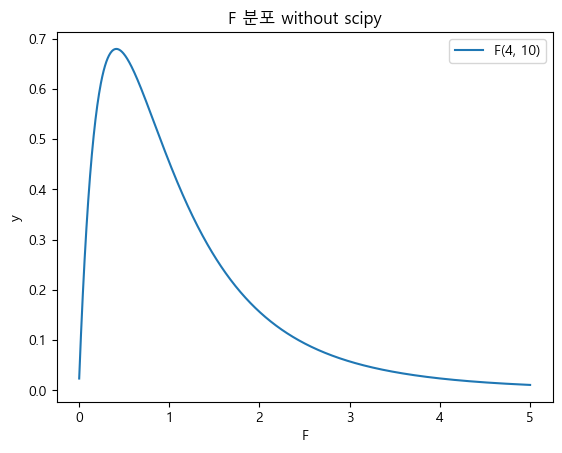

In [14]:
import matplotlib.pyplot as plt

plt.plot(x, y, label=f'F({nu1}, {nu2})')                       
plt.xlabel('F')
plt.ylabel("y")
plt.title('F 분포 without scipy')
plt.legend()
plt.show()

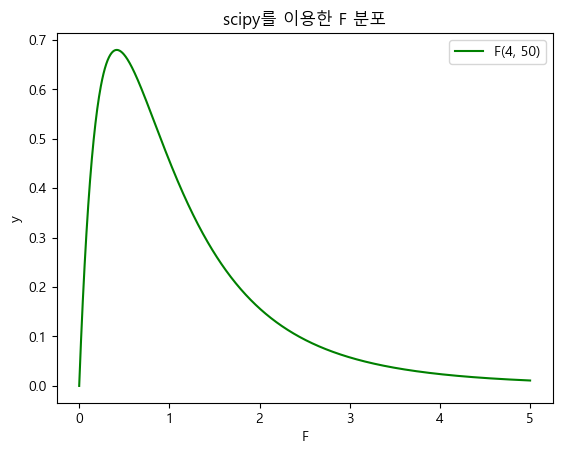

In [15]:
# scipy를 이용한 F분포 형성
import scipy.stats as stats

# 카이제곱분포를 따르는 확률변수의 자유도가 nu1, nu2일 때 F분포의 확률밀도함수는 y1으로 정의된다.
y1 = stats.f(nu1, nu2).pdf(x)        


plt.plot(x, y1, color="g", label='F(4, 50)')             
plt.xlabel('F')
plt.ylabel("y")
plt.title('scipy를 이용한 F 분포')
plt.legend()
plt.show()

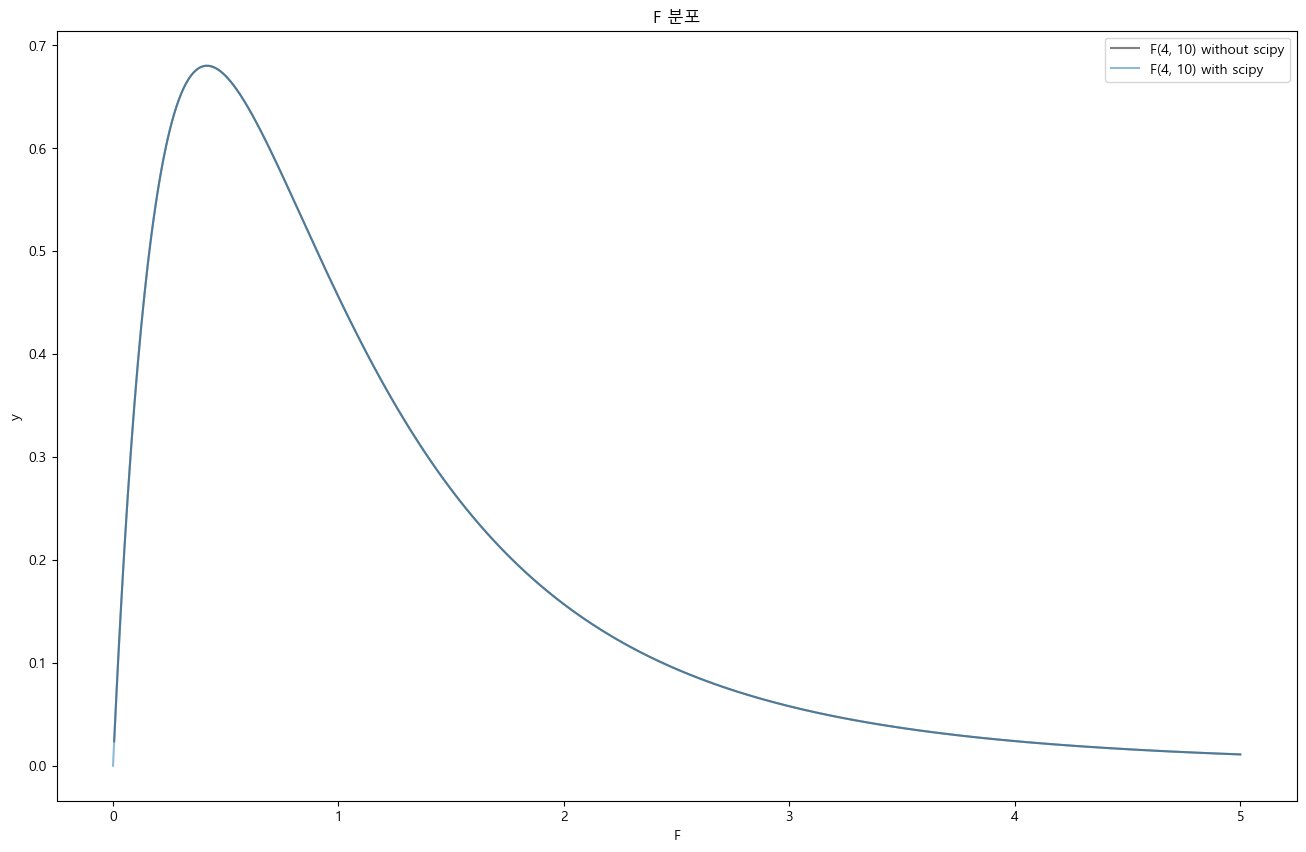

In [16]:
# 과연 위에서 형성한 두 분포가 일치하는지 검토해보는 부분
import matplotlib.pyplot as plt
import scipy.stats as stats

# 카이제곱분포를 따르는 확률변수의 자유도가 nu1, nu2일 때 F분포의 확률밀도함수는 y1으로 정의된다.
y1 = stats.f(nu1, nu2).pdf(x)        

plt.figure(figsize=(16,10))
plt.plot(x, y, alpha=.5, color="k", label=f'F({nu1}, {nu2}) without scipy')  
plt.plot(x, y1, alpha=.5, label=f'F({nu1}, {nu2}) with scipy')                                  
plt.xlabel('F')
plt.ylabel("y")
plt.title('F 분포')
plt.legend()
plt.show()

# D. 카이제곱 분포

In [17]:
# 라이브러리 호출
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt

DF = 4

# 데이터 형성 
X = np.linspace(0, 15, 151)

# 시각화
plt.plot(X, sp.stats.chi2(DF).pdf(X), label=f"Chi2 (DF = {DF})")
plt.legend()
plt.title('Chi-Square df')
plt.show()

AttributeError: module 'scipy.special' has no attribute 'stats'

In [ ]:
def chi2(DF):
    import numpy as np
    from scipy.stats import chi2
    import matplotlib.pyplot as plt

    X = np.linspace(0, 15, 151)

    plt.plot(X, chi2(DF).pdf(X), label=f"Chi2 (Degree of Freedom = {DF})")
    plt.legend()
    plt.title('Chi-Square df')
    plt.show()